## Will Paz

In [1]:
import numpy as np
from matplotlib import pyplot as plt, image
from scipy import ndimage
from numpy.linalg import svd

### Functions from Markers 1 and 2

In [2]:
def imsplit(image):
    return image[:,:,0],image[:,:,1],image[:,:,2]

def imjoin(R,G,B):
    m,n = R.shape
    image = np.ndarray(shape=(m,n,3),dtype=float)
    image[:,:,0] = R
    image[:,:,1] = G
    image[:,:,2] = B
    return image

def rankplot2(picture,rank):
    """
    As the user inputs an image and we will output three plots with the x values being 
    [0,1,2,...,rank] and y[i] is the standard deviation captured by the first i singular values.
    We will do this for all three of the colors (red,green,blue).
     
    Input(s): An image
     
    Outputs: One plot with three graphs, one red, one green, and one blue and the y vector.
     
    Note: replace np.sum(S[0:i]**2)/np.sum(S**2) with np.sum(S[0:i])/np.sum(S)
    """
    x = np.arange(rank)
        
    rawim = image.imread(picture)
    im = rawim.copy()
    im = (1/255)*im
    R,G,B = imsplit(im)
    
    _,SR,_ = svd(R, full_matrices=False)
    _,SG,_ = svd(G, full_matrices=False)
    _,SB,_ = svd(B, full_matrices=False)

    pct_var_SR = np.zeros(rank)
    pct_var_SG = np.zeros(rank)
    pct_var_SB = np.zeros(rank)
    
    for i in range(0,rank):
        pct_var_SR[i] = np.sum(SR[0:i])/np.sum(SR) 
        pct_var_SG[i] = np.sum(SG[0:i])/np.sum(SG)
        pct_var_SB[i] = np.sum(SB[0:i])/np.sum(SB)
        
    plt.plot(x, pct_var_SR, label='Red')
    plt.plot(x, pct_var_SG, label='Green')
    plt.plot(x, pct_var_SB, label='Blue')

    return plt.show(), pct_var_SR, pct_var_SG, pct_var_SB

In [3]:
def clip01(A):
    A[A < 0] = 0
    A[A > 1] = 1
    return A

def scaler(A):
    R,G,B = A[:,:,0], A[:,:,1], A[:,:,2]
    
    min_R, max_R = np.min(R), np.max(R)
    min_G, max_G = np.min(G), np.max(G)
    min_B, max_B = np.min(B), np.max(B)

    def linear_function(x, min_val, max_val):
        return (x-min_val)/(max_val-min_val)
    
    scaled_R = linear_function(R, min_R, max_R)
    scaled_G = linear_function(G, min_G, max_G)
    scaled_B = linear_function(B, min_B, max_B)
    
    return np.stack([scaled_R, scaled_G, scaled_B], axis=-1)

def reducer(picture, method='clip01', rrank=50, brank=None, grank=None):
    
    if brank is None:
        brank = rrank
    if grank is None:
        grank = rrank
    
    A = image.imread(picture).copy()
    
    if A.dtype == np.uint8:
        A = (1/255) * A
    
    def rank_reduce_svd(color, rank):
        U,S,V = np.linalg.svd(color, full_matrices=False)
        reduced_pic = np.dot(U[:, :rank], np.dot(np.diag(S[:rank]), V[:rank, :]))
        return reduced_pic
    
    R = A[:, :, 0]
    G = A[:, :, 1]
    B = A[:, :, 2]
    
    reduced_R = rank_reduce_svd(R, rrank)
    reduced_G = rank_reduce_svd(G, grank)
    reduced_B = rank_reduce_svd(B, brank)
    
    reduced_image = np.stack([reduced_R, reduced_G, reduced_B], axis=-1)
    
    if method == 'clip01':
        reduced_image = clip01(reduced_image)
    elif method == 'scaler':
        reduced_image = scaler(reduced_image)
    
    return plt.imshow(reduced_image)

### Image 1: Spline Project Photo

#### The Original Picture of a Snake:

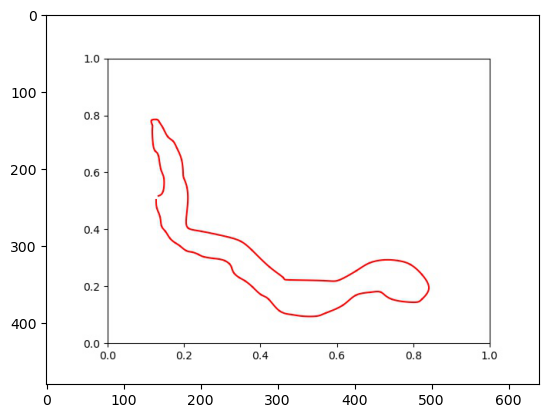

### Rank Analysis for the Spline Snake

Below, I will be analyzing the rankplots of the picture at various ranks, and besides each rankplot you will find the image of that rank corresponding to such rankplot. After some scavenging around for a rank that would be appropriate for optimize compress, I simply used some trial and error to create a qualitative estimate of the optimal compressing value. For the spline snake, I chose rank 75.

Rank | RankPlot | Image
- | - | - 
Rank 5 | 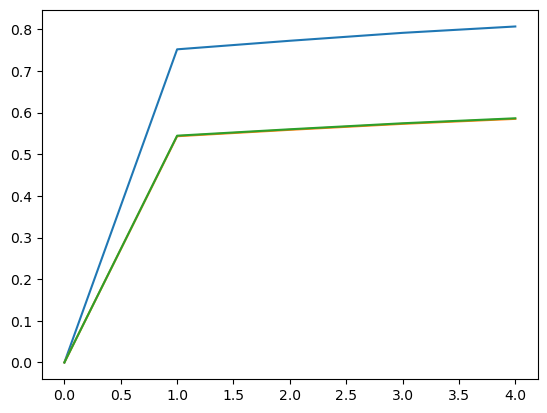 | 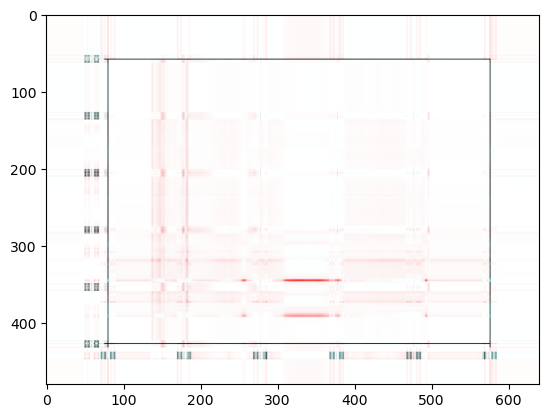
Rank 10 | 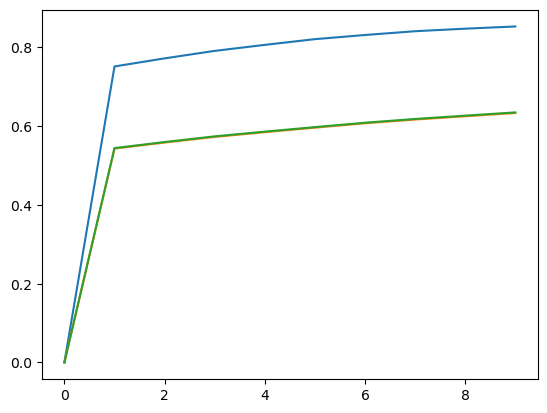 | 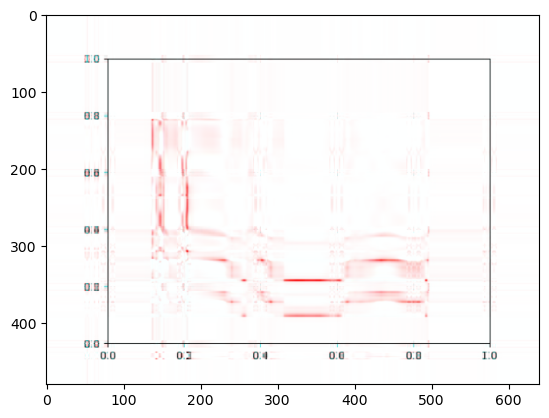
Rank 25 | 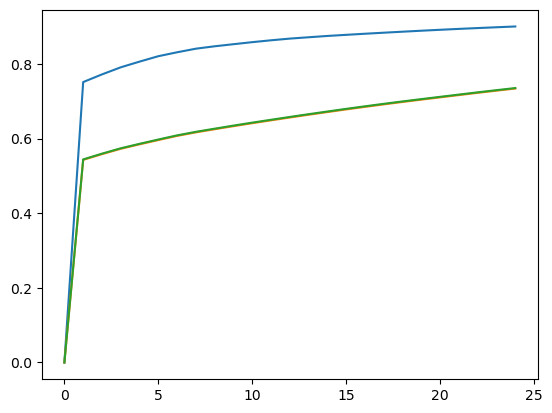 | 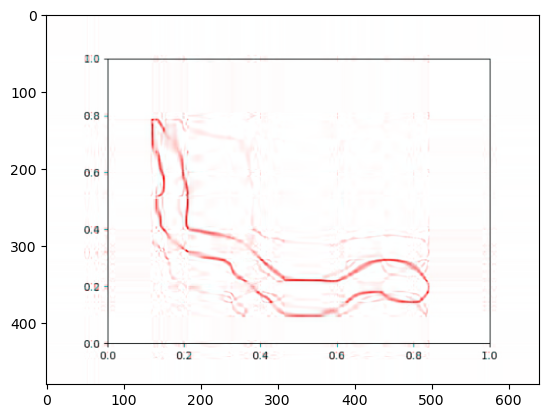
Rank 50 | 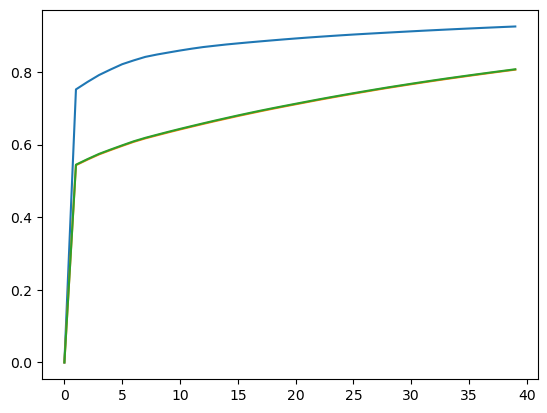 | 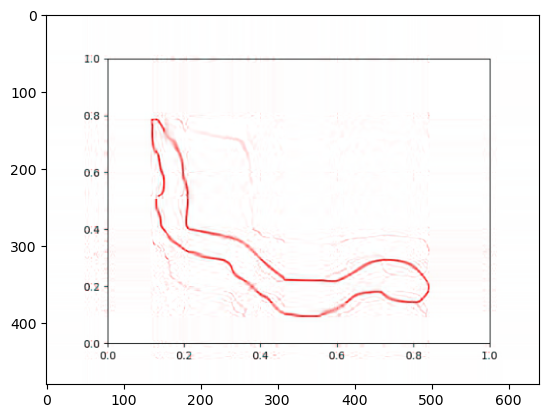
Rank 75 | 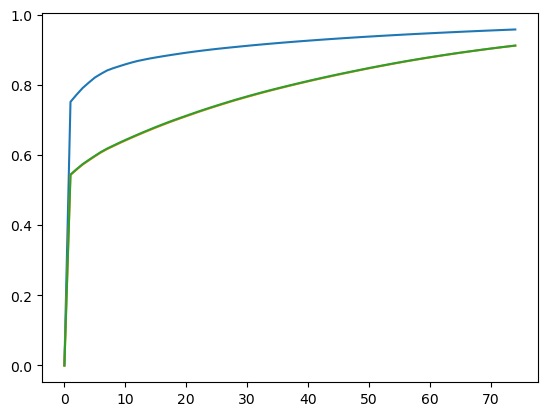 | 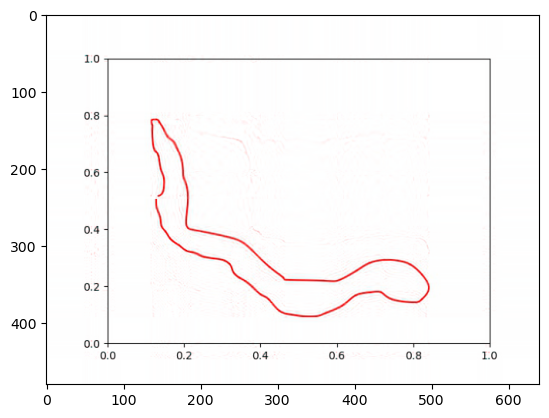

As you can see above, as the rank increases the quality of the image does as well. The images are indecipherbale up to rank 25 where you can see the snake with minimal "color residue." So, once I reached rank 75, you can clearly see the image with very little noticeable "color residue," thus making it an optimal compression value.

### Image 2: Brad Pitt from F**** C***

#### The Original Picture of Brad Pitt:

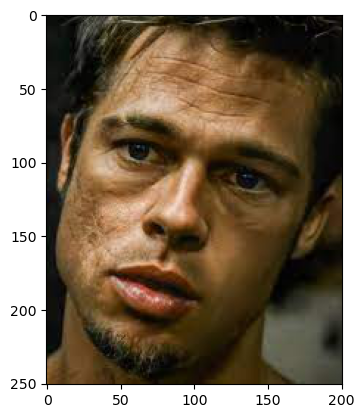

### Rank Analysis of Brad Pitt

Below, I will be analyzing the rankplots of the picture of Brad Pitt at various ranks, and besides each rankplot you will find the image of that rank corresponding to such rankplot. After some scavenging around for a rank that would be appropriate for optimize compress, I simply used some trial and error to create a qualitative estimate of the optimal compressing value. I decided to choose rank 50 for the photo of Brad Pitt from the iconic film, F**** C***.

Rank | RankPlot | Image
- | - | - 
Rank 10 | 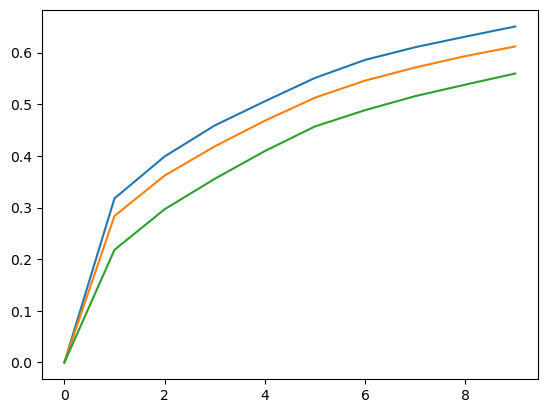 | 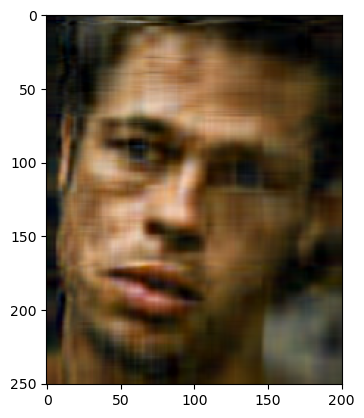
Rank 20 | 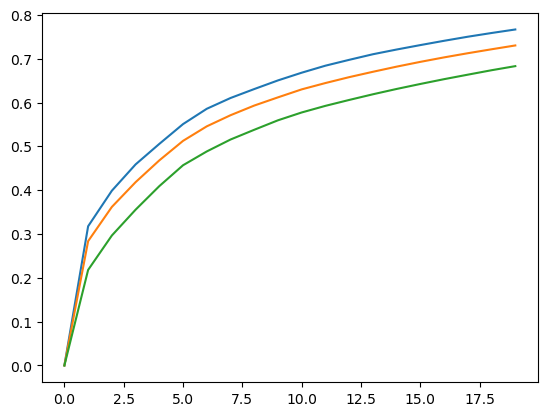 | 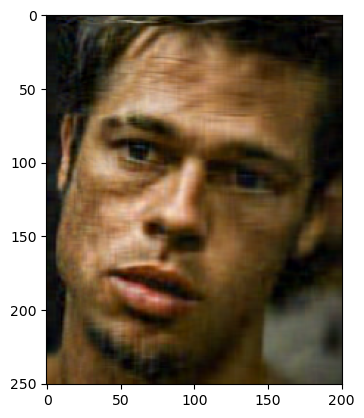
Rank 30 | 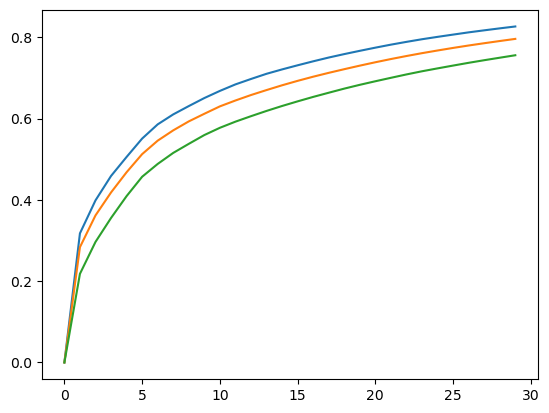 | 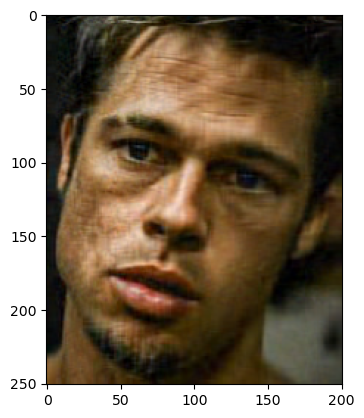
Rank 40 | 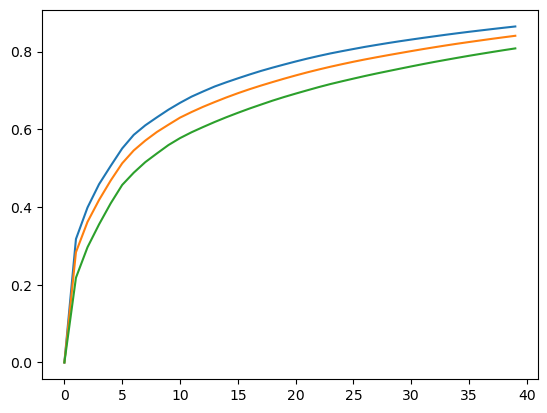 | 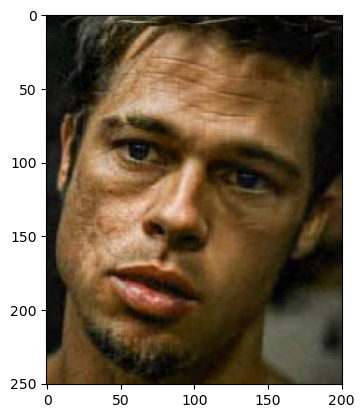
Rank 50 | 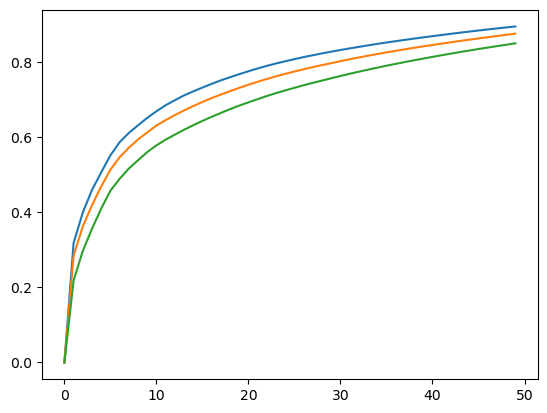 | 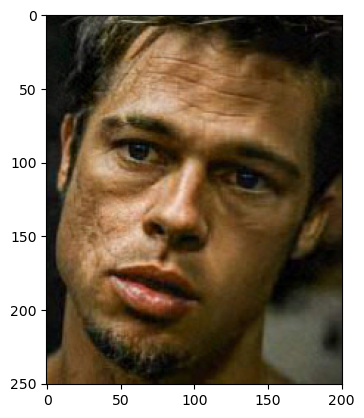

As shown above, the image becomes clearer at lower ranks compared to the likes of the spline snake. Because of this, we are able to optimize the image compression with a lower rank. I could have chosen a lower rank than 50 to yield a similar result, but I felt like the very minor details changed in ranks 30 and 40 help paint the picture of how insignificant the changes from rank to rank are as the rank increases.

### Image 3: The Green Monster at Fenway Park

#### The Original Picture of the Green Monster:

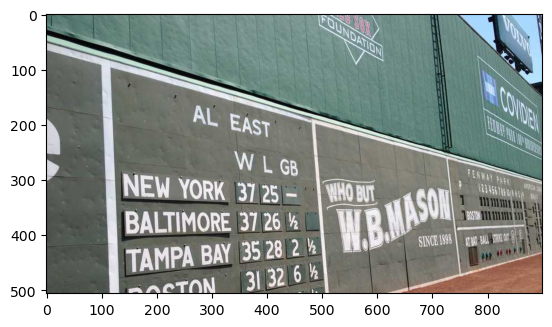

### Rank Analysis of the Green Monster

Here you will find my favorite of the three photos. That is because it is of one of the most beautiful things in the world, Fenway Park. Below, I will be analyzing the rankplots of the picture of the Red Sox' home field at various ranks, and besides each rankplot you will find the image of that rank corresponding to such rankplot. After some scavenging around for a rank that would be appropriate for optimize compress, I simply used some trial and error to create a qualitative estimate of the optimal compressing value. After some consideration, I chose to use rank 80 as the qualitative optimized rank.

Rank | RankPlot | Image
- | - | - 
Rank 10 | 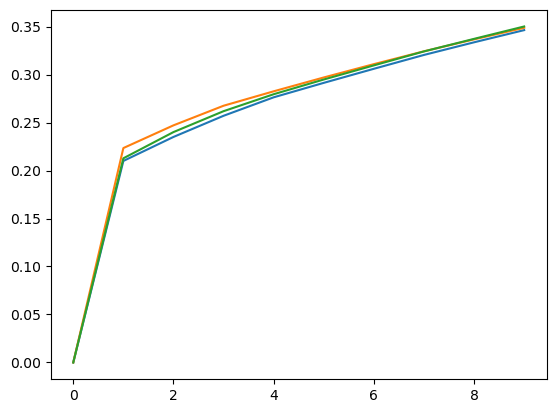 | 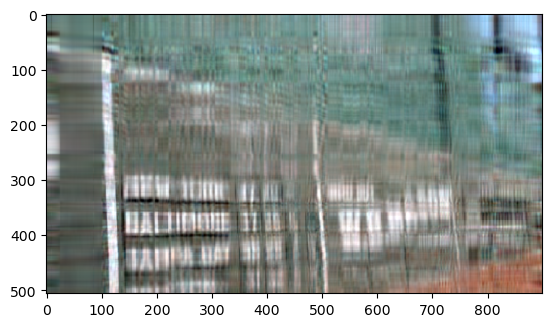
Rank 20 | 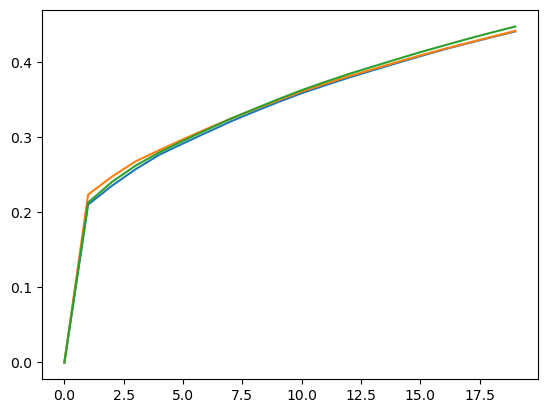 | 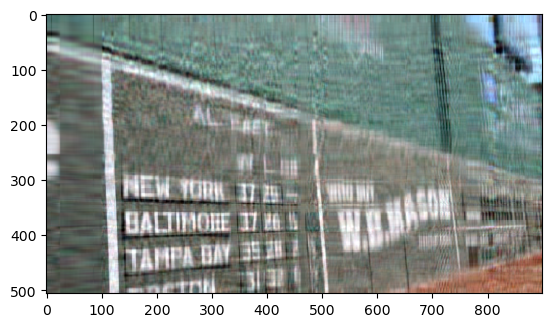
Rank 40 | 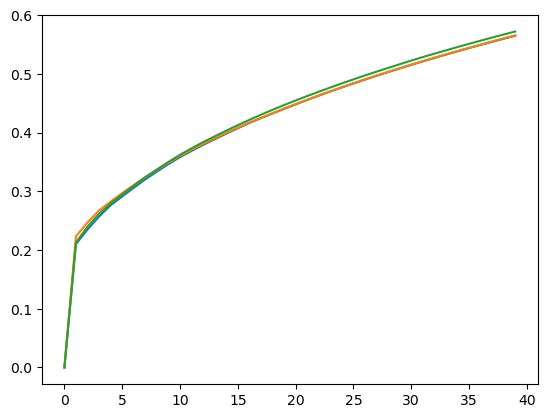 | 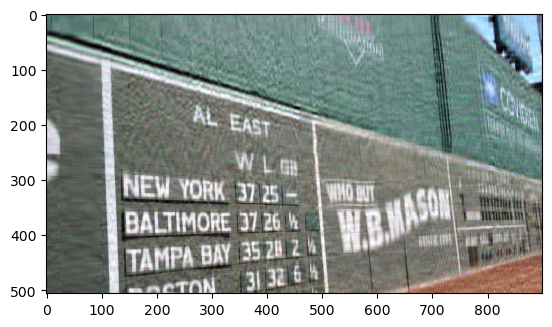
Rank 60 | 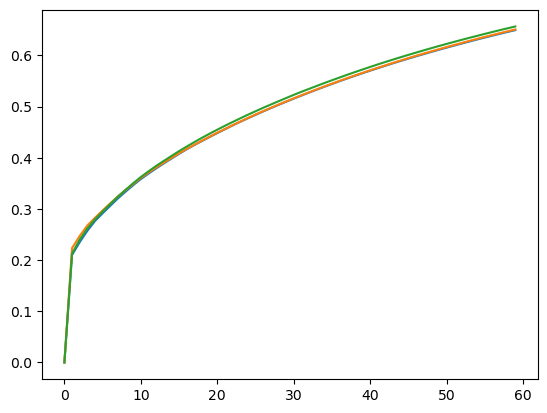 | 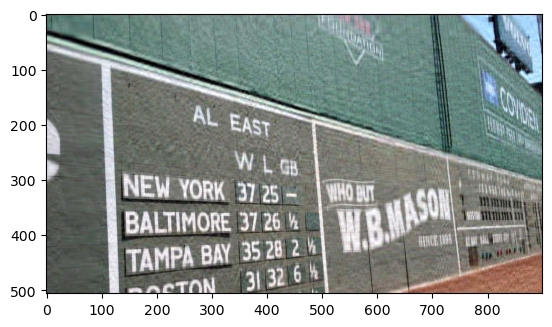
Rank 80 | 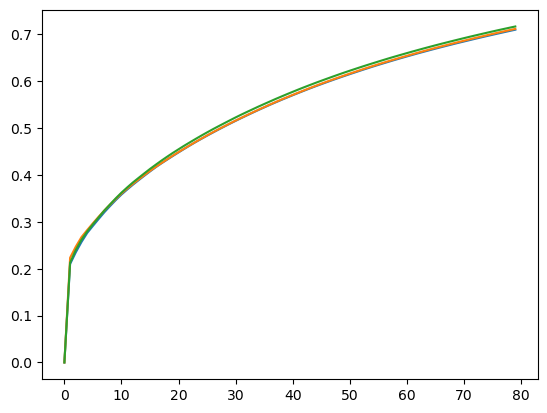 | 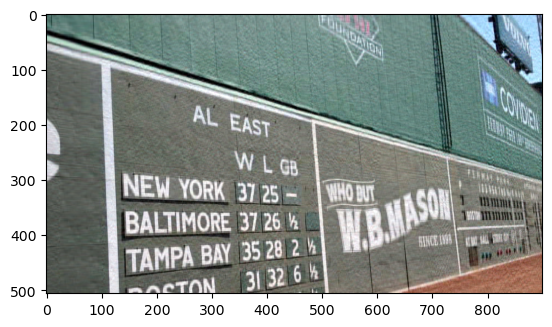

The difference between this image and the other two lie in that the rankplots are so closely correlated in each of the ranks, while the image may be all over the place. But, as with the others, the rank to be able to clearly see the image versus the entire rank are vastly different, leading to a quality way to compress images.